In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## First model

We have such a equation
$$\frac{dG}{dt}=p_1 G + p_2$$
And the solution is
$$G(t) = (p_3+\frac{p_2}{p_1}) e^{p_1t}-\frac{p_2}{p_1}$$

In [27]:
p_1=-1.09 / 10
p_2=8.5

p_3=150
size = 60

T = np.linspace(0, size, size+1)
G = np.array([(p_3 + p_2/p_1)*np.exp(p_1 * t) - p_2/p_1 + sps.norm(0, 1).rvs(1)[0] for t in T])

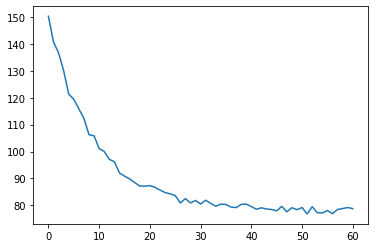

In [28]:
plt.plot(T, G)

In [29]:
Y = [G[_ + 1] - G[_] for _ in range(size)]
X = np.array(G[1:]).reshape((-1, 1))

In [30]:
model = LinearRegression().fit(X[:], Y[:])
y_pred = model.predict(X[:])

In [31]:
model.coef_, model.intercept_

(array([-0.11626355]), 9.092241015568838)

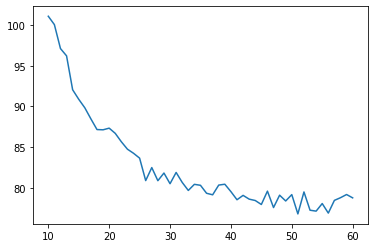

In [32]:
plt.plot(T[10:], G[10:])

In [9]:
r2_score(y_pred, G[1:] - G[:-1])

0.9834872985079617

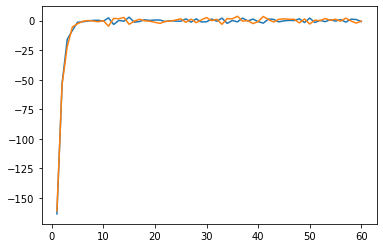

In [10]:
plt.plot(T[1:], G[1:] - G[:-1])
plt.plot(T[1:], y_pred)

## TODO

0) Discover why parameters we found doesn't match true one - Vardan

1) Try time step 1 second instead 1 min - Lorenz

2) Try different model for first model - Anastasia

3) Try to do the same for second model - Stan